# Loading and Cleaning Data

In [1]:
library('car')
library('stargazer')

Loading required package: carData

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [2]:
# Loads crime_v2.csv
crime <- read.csv("crime_v2.csv", header=TRUE)

In [3]:
# Eliminates rows with missing values
clean <- crime[complete.cases(crime),]

In [4]:
# Checks that blank rows aren't present
clean[clean$prbconv == '' | clean$prbconv=='`',]
clean[clean$year == "NA",]
tail(clean)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
86,189,87,0.0313130,0.161381,0.300577998,0.288462,12.27,0.00227837,1.1019108,31.33022,⋯,354.2510,180.9359,369.4332,253.2281,304.72,427.84,451.79,297.19,0.05719921,0.15092644
87,191,87,0.0458895,0.172257,0.449999988,0.421053,9.59,0.00122733,1.7725632,32.74533,⋯,400.8570,230.9888,320.0345,238.4958,295.26,334.55,375.45,327.62,0.08616445,0.08828809
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.11050157,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.11050157,0.07819394
90,195,87,0.0313973,0.201397,1.670519948,0.470588,13.02,0.00445923,1.7459893,53.66693,⋯,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
91,197,87,0.0141928,0.207595,1.182929993,0.360825,12.23,0.00118573,0.8898810,25.95258,⋯,341.8803,182.8020,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893


In [5]:
# Checks for duplicate rows
clean[duplicated(clean),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [6]:
# Verifies which row is a duplicate
clean[clean$county == 193,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [7]:
# Eliminates duplicate rows
clean <- clean[!duplicated(clean),]

In [8]:
# Checks for duplicate rows
duplicated(clean)
length(duplicated(clean))
dim(clean)

clean[duplicated(clean),]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 90

[1] 90 25

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


In [9]:
# Verifies which row is a duplicate
clean[clean$county == 193,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [10]:
# Re-cast 'prbconv' from factors into numbers
clean$prbconv <- as.numeric(as.character(clean$prbconv))

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 51.5   1st Qu.:87   1st Qu.:0.020604   1st Qu.:0.20495  
 Median :103.0   Median :87   Median :0.030002   Median :0.27146  
 Mean   :100.6   Mean   :87   Mean   :0.033510   Mean   :0.29524  
 3rd Qu.:150.5   3rd Qu.:87   3rd Qu.:0.040249   3rd Qu.:0.34487  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34422   1st Qu.:0.3642   1st Qu.: 7.375   1st Qu.:0.0012378  
 Median :0.45170   Median :0.4222   Median : 9.110   Median :0.0014897  
 Mean   :0.55086   Mean   :0.4106   Mean   : 9.689   Mean   :0.0017080  
 3rd Qu.:0.58513   3rd Qu.:0.4576   3rd Qu.:11.465   3rd Qu.:0.0018856  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

'data.frame':	90 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

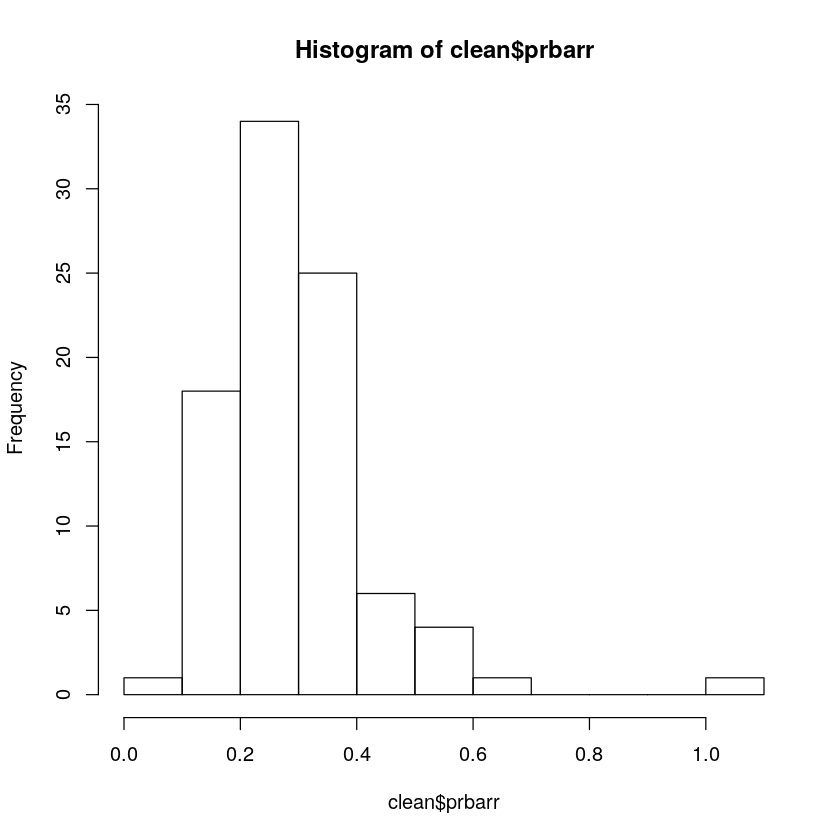

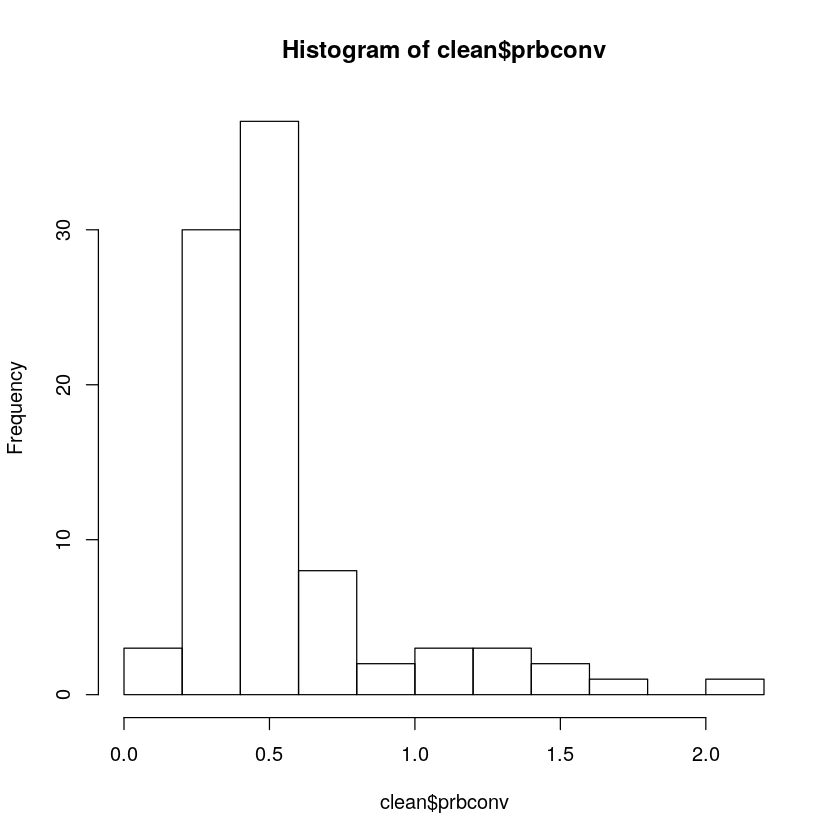

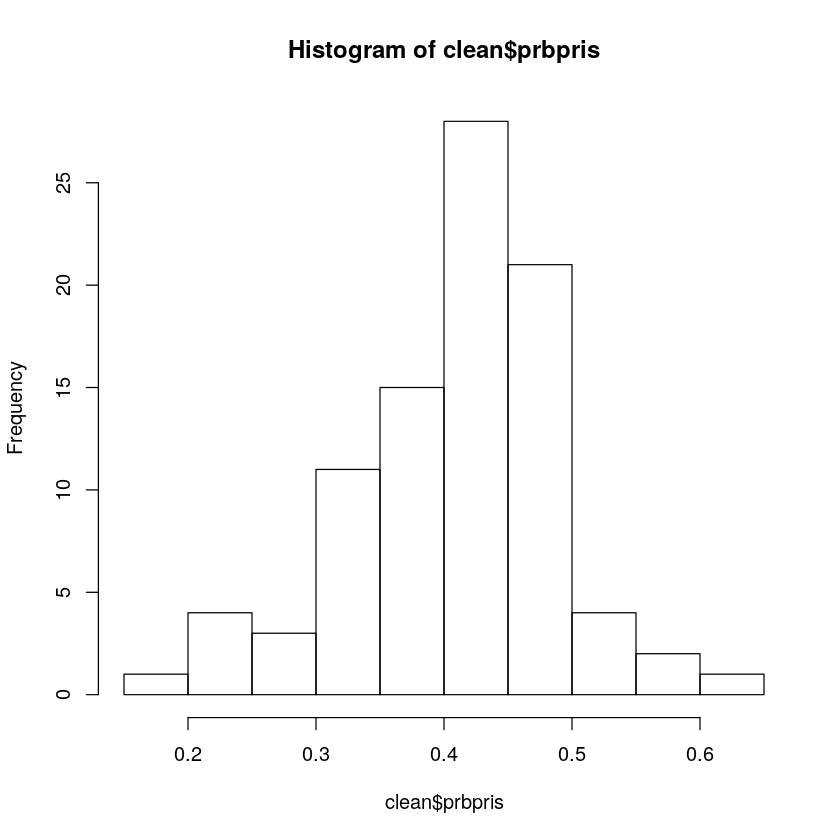

In [11]:
summary(clean)
str(clean)
hist(clean$prbarr)
hist(clean$prbconv)
hist(clean$prbpris)

# Building Regressions

## Model 1: Our Base Model 

We wanted to understand if an increasing probability of incarceration for offenders ($prbpris$) is associated with lower crime rates ($crmrte$) or if alternative sentences (e.g., probation) are  

DOESN'T APPEAR TO MATTER; INCARCERATION OR NO INCARCERATION DOES NOT CORRELATE WITH CRIME RATE. IF THIS IS TRUE, FROM A POLICY PERSPECTIVE, IT WOULD BE WORTH EXPLORING CHEAPER ALTERNATIVES. 

We wanted to understand if an increasing probability of incarceration for offenders ($prbpris$) is associated with lower crime rates ($crmrte$); consequently, our base model regresses our primary outcome variable $crmrte$ on the independent variable $prbpris$. However, an offender must first be arrested and convicted of a crime before s/he faces the possibility of serving prison time. Importantly, the probability that s/he will be arrested ($prbarr$) and the probability s/he will actually be convicted of a crime ($prbconv$) might also be associated with changes in $crmrte$. For example, we speculate that potential offenders could in principle be loathe to commit crimes in locales that have a higher propensity for arresting suspects. Similarly, convictions that do not result in incarceration but that place offenders on probation or that punish them with fines and/or community service could in principle reduce crime rate. Consequently, we also included $prbarr$ and $prbconv$ as regressors in our base model to control for these (and other) potential effects that could be associated with changes in these variables.

To begin, we regressed $crmrte$ on each of these variables ($prbarr$, $prbconv$, and $prbpris$) individually. In so doing, we discovered that the $prbpris$ appears to be uncorrelated with $crmrte$ $(R^2 = 0.00)$; thus, to a first approximation and without accounting for other variables, this model suggests that an increasing probability of incarceration is not associated with lower crime rates nor is a decreasing probability of incarceration associated with higher crime rates. In contrast, increasing $prbarr$ and $prbconv$ appeared to be associated with lower $crmrte$. Specifically, each unit increase in $prbarr$ is associated with a 0.054 unit decrease in $crmrte$ $(R^2 = 0.16)$, while each unit increase in $prbconv$ is associated with a 0.021 unit decrease in $crmrte$ $(R^2 = 0.15)$. 

We also considered the possibility that the length of a possible prison sentence (i.e., $avgsen$) might confer a better fit than $prbpris$; however, we did not employ $avgsen$ as a regressor in our base model because (i) a simple regression of $crmrte$ on $avgsen$ reveals that $avgsen$ does not explain any variation in $crmrte$ (i.e., R$^2$=0) and (ii) it is also positively correlated with $prbpris$. Consequently, we judged that including $avgsen$ in our base model would only serve to increase the variance of our estimates for other coefficients with little gain. 

Next, we explored transformations that might improve our model's fit to these data. Although the maximum value of $crmrte$ is only ~18 times greater than its minimum value, (0.0055 vs. 0.099), we discovered that regressions of  $\log{crmrte}$ on $prbarr$ or $prbconv$ individually had better fits $(prbarr: R^2 = 0.22$ and $prbconv: R^2 = 0.20)$ than regressions of $crmrte$ on $prbarr$ or $prbconv$ $(prbarr: R^2 = 0.15$ and $prbconv: R^2 = 0.16)$. Thus, we chose to employ $\log_{crmrte}$ in our base model. 

We also chose to log-transform all of our regressors. Doing so sacrifices a slightly better fit as compared to modeling untransformed regressors $(R^2 = 0.45$ vs. $R^2 = 0.41)$. However, the units of our dependent variable and independent variables are somewhat disparate and obscure, and the log-transformed regressors facilitate more easily understood comparisons between them in terms of % changes. Specifically, each slope coefficient $\beta_j$ will describe how a 1% change in the corresponding regressor changes $crmrte$ by $\beta_j * 1\% = \beta_j\%$ Additionally, employing log-transformed regressors flattened the model's residuals vs. fitted values plot, which helped it conform to the zero-conditional mean assumption of the classic linear model (CLM). Employing log-transformed regressors also reduced the influence that all outliers have on our model (all data points have a Cook's distance below 0.5 in our model). Having fully specified our base model, we calculated the least-squares fit below. 

$$ \log crmrte = -4.71 - 0.72*\log prbarr - 0.47*\log prbconv + 0.15*\log prbpris $$

We set out to determine if the probability with which an offender receives a prison sentence is associated with a lower crime rate; the coefficients in our multivariate model indicate that the probability with which offenders receive prison sentences upon conviction is associated with an increasing crime rate, but that increasing the probabilities of arrest and conviction are associated with decreasing crime rate. Since they have negative slope coefficients, our model suggests that $prbarr$ and $prbconv$ are associated with reduced $crmrte$, but that $prbpris$, which has a positive slope coefficient, is not. Specifically, we expect 1% increases in the probability of arrest or probability of conviction will correspond with 0.72% or 0.47% reductions in crime rate; in contrast, we our model predicts that a 1% increase in the probability of prison sentence is associated with a 0.15% increase in crime rate.

_We're choosing to refrain from a discussion of practical significance until we obtain error terms to evaluate statistical significance. However, in brief, we speculate that $\beta_{prbarr}$ and $\beta_{prbconv}$ are practically significant, but that $\beta_{prbpris}$ probably is not. Prison is very expensive relative to alternative sentences. However, our model suggests that compartively larger reductions in crime are associated with simply arresting suspects and convicting offenders; incarcerating, which is more costly, is not associated with higher or lower crime rates._

Importantly, we cannot claim that any causal effects exist in these relationships. For example, an increased probability of prison might be associated with higher crime rate because locales with higher violent crime rates sentence more people to prison; this in and of itself would not suggest that increasing the rates of incarceration would reduce crime rates. Similarly, areas with lower crime rates might simply have higher rates of arrests and convictions because the lower crime rates facilitate these effects; stated another way, other factors (e.g., poverty rates, education) could play a more direct role in reducing crime. 

In light of the fact that we cannot define a causal relationship between these variables, we recommend that you establish pilot programs in some counties that attempt to test some of these observations. If retrospective analyses indicate that the programs appear to have reduced crime rates (especially in comparison with similar counties that are not executing a similar pilot), then you can launch these initiatives statewide. Specifically, we recommend that you campaign on pilot policy prescriptions that are designed to (i) increase arrest rates, (ii) increase conviction rates, and (iii) offer alternatives to prison for offenders. For example, you might consider increasing funding to process evidence (e.g., rape kits, DNA tests) to crack cold cases and increase arrests, adding more prosecutorial staff to process more cases, or altering sentencing guidelines to disfavor prison (in some instances). 

## EXCLUDED AVGSEN B/C PRBPRIS DIDN'T SEEM TO HAVE AN EFFECT AND AVGSEN IS CORRELATED WITH PRBPRIS; INCLUDING THIS VARIABLE WOULDN'T BE INFORMATIVE AND WOULD REDUCE OUR BASE MODEL'S PARISOMONY

## DISCUSS PROBLEM DATA POINTS AND IF WE CAN EXCLUDE (IF WE DON'T ALREADY DO SO ABOVE)

## EVALUATE IF WE MEET CLM

## DISCUSS PRACTICAL SIGNIFICANCE OF COEFFICIENTS

## Code for Our Proposed Model

In [12]:
model1 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris), data=clean)
# summary(model1)
paste("Model:", summary(model1)$call[2])
paste("Slope (log(prbarr)):", model1$coef[2])
paste("Slope (log(prbconv)):", model1$coef[3])
paste("Slope (log(prbpris)):", model1$coef[4])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

[1] "Model: log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris)"

[1] "Slope (log(prbarr)): -0.723804208413992"

[1] "Slope (log(prbconv)): -0.471991225676325"

[1] "Slope (log(prbpris)): 0.147727732051512"

[1] "Intercept: -4.70767874893467"

[1] "R-squared: 0.41"

[1] "Adjusted R-squared: 0.39"

[1] "Akaike Information Criterion: 108"

[1] "###############################"

## Testing Different Regressions

In [13]:
# Testing different regressions

model1 <- lm(crmrte ~ avgsen, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(crmrte ~ prbarr, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(crmrte ~ prbconv, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(crmrte ~ prbpris, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")
paste("*******************************")

model1 <- lm(log(crmrte) ~ prbarr, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(log(crmrte) ~ prbconv, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(log(crmrte) ~ prbpris, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")
paste("*******************************")

model1 <- lm(crmrte ~ log(prbarr), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(crmrte ~ log(prbconv), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(crmrte ~ log(prbpris), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")
paste("*******************************")

model1 <- lm(log(crmrte) ~ log(prbarr), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(log(crmrte) ~ log(prbconv), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(log(crmrte) ~ log(prbpris), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")
paste("*******************************")

model1 <- lm(crmrte ~ prbarr + prbconv + prbpris, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(log(crmrte) ~ prbarr + prbconv + prbpris, data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model1 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris), data=clean)
paste("Model:", summary(model1)$call[2])
paste("Slope:", model1$coef[2])
paste("Intercept:", model1$coef[1])
paste("R-squared:", round(summary(model1)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

[1] "Model: crmrte ~ avgsen"

[1] "Slope: 0.000131920111416843"

[1] "Intercept: 0.032231764995464"

[1] "R-squared: 0"

[1] "Adjusted R-squared: -0.01"

[1] "Akaike Information Criterion: -454"

[1] "###############################"

[1] "Model: crmrte ~ prbarr"

[1] "Slope: -0.0542278121865468"

[1] "Intercept: 0.0495200097730725"

[1] "R-squared: 0.16"

[1] "Adjusted R-squared: 0.15"

[1] "Akaike Information Criterion: -469"

[1] "###############################"

[1] "Model: crmrte ~ prbconv"

[1] "Slope: -0.0205811570195115"

[1] "Intercept: 0.044847282664666"

[1] "R-squared: 0.15"

[1] "Adjusted R-squared: 0.14"

[1] "Akaike Information Criterion: -469"

[1] "###############################"

[1] "Model: crmrte ~ prbpris"

[1] "Slope: 0.0112364581232119"

[1] "Intercept: 0.0288959467111836"

[1] "R-squared: 0"

[1] "Adjusted R-squared: -0.01"

[1] "Akaike Information Criterion: -454"

[1] "###############################"

[1] "*******************************"

[1] "Model: log(crmrte) ~ prbarr"

[1] "Slope: -1.88437913757391"

[1] "Intercept: -2.98538790245543"

[1] "R-squared: 0.22"

[1] "Adjusted R-squared: 0.21"

[1] "Akaike Information Criterion: 130"

[1] "###############################"

[1] "Model: log(crmrte) ~ prbconv"

[1] "Slope: -0.692237110835607"

[1] "Intercept: -3.16040086782289"

[1] "R-squared: 0.2"

[1] "Adjusted R-squared: 0.19"

[1] "Akaike Information Criterion: 132"

[1] "###############################"

[1] "Model: log(crmrte) ~ prbpris"

[1] "Slope: 0.146040749709391"

[1] "Intercept: -3.60169542314763"

[1] "R-squared: 0"

[1] "Adjusted R-squared: -0.01"

[1] "Akaike Information Criterion: 152"

[1] "###############################"

[1] "*******************************"

[1] "Model: crmrte ~ log(prbarr)"

[1] "Slope: -0.0197279467744946"

[1] "Intercept: 0.00777726364119923"

[1] "R-squared: 0.18"

[1] "Adjusted R-squared: 0.17"

[1] "Akaike Information Criterion: -472"

[1] "###############################"

[1] "Model: crmrte ~ log(prbconv)"

[1] "Slope: -0.0122782889774807"

[1] "Intercept: 0.0242333830935284"

[1] "R-squared: 0.13"

[1] "Adjusted R-squared: 0.12"

[1] "Akaike Information Criterion: -467"

[1] "###############################"

[1] "Model: crmrte ~ log(prbpris)"

[1] "Slope: 0.00724414447447469"

[1] "Intercept: 0.0401182723402814"

[1] "R-squared: 0.01"

[1] "Adjusted R-squared: 0"

[1] "Akaike Information Criterion: -455"

[1] "###############################"

[1] "*******************************"

[1] "Model: log(crmrte) ~ log(prbarr)"

[1] "Slope: -0.593594251597862"

[1] "Intercept: -4.31599745594332"

[1] "R-squared: 0.19"

[1] "Adjusted R-squared: 0.18"

[1] "Akaike Information Criterion: 133"

[1] "###############################"

[1] "Model: log(crmrte) ~ log(prbconv)"

[1] "Slope: -0.365789095055738"

[1] "Intercept: -3.81808976625326"

[1] "R-squared: 0.14"

[1] "Adjusted R-squared: 0.13"

[1] "Akaike Information Criterion: 139"

[1] "###############################"

[1] "Model: log(crmrte) ~ log(prbpris)"

[1] "Slope: 0.171997088103733"

[1] "Intercept: -3.38482592065875"

[1] "R-squared: 0"

[1] "Adjusted R-squared: -0.01"

[1] "Akaike Information Criterion: 152"

[1] "###############################"

[1] "*******************************"

[1] "Model: crmrte ~ prbarr + prbconv + prbpris"

[1] "Slope: -0.0578199439560816"

[1] "Intercept: 0.0557261670847096"

[1] "R-squared: 0.33"

[1] "Adjusted R-squared: 0.3"

[1] "Akaike Information Criterion: -486"

[1] "###############################"

[1] "Model: log(crmrte) ~ prbarr + prbconv + prbpris"

[1] "Slope: -1.99917324525741"

[1] "Intercept: -2.68462972417512"

[1] "R-squared: 0.45"

[1] "Adjusted R-squared: 0.43"

[1] "Akaike Information Criterion: 102"

[1] "###############################"

[1] "Model: log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris)"

[1] "Slope: -0.723804208413992"

[1] "Intercept: -4.70767874893467"

[1] "R-squared: 0.41"

[1] "Adjusted R-squared: 0.39"

[1] "Akaike Information Criterion: 108"

[1] "###############################"

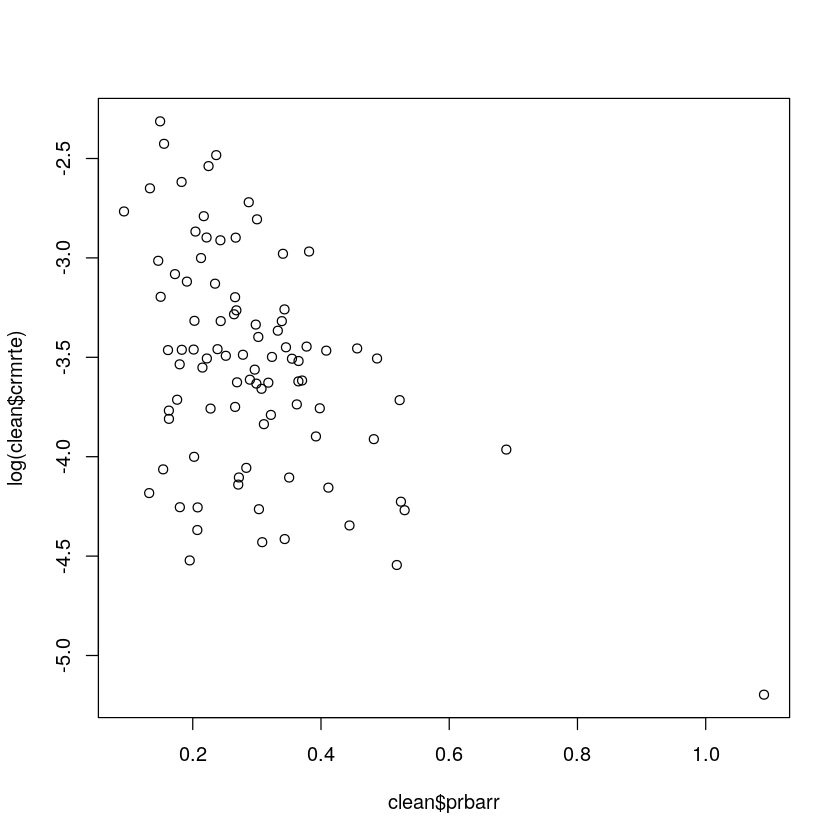

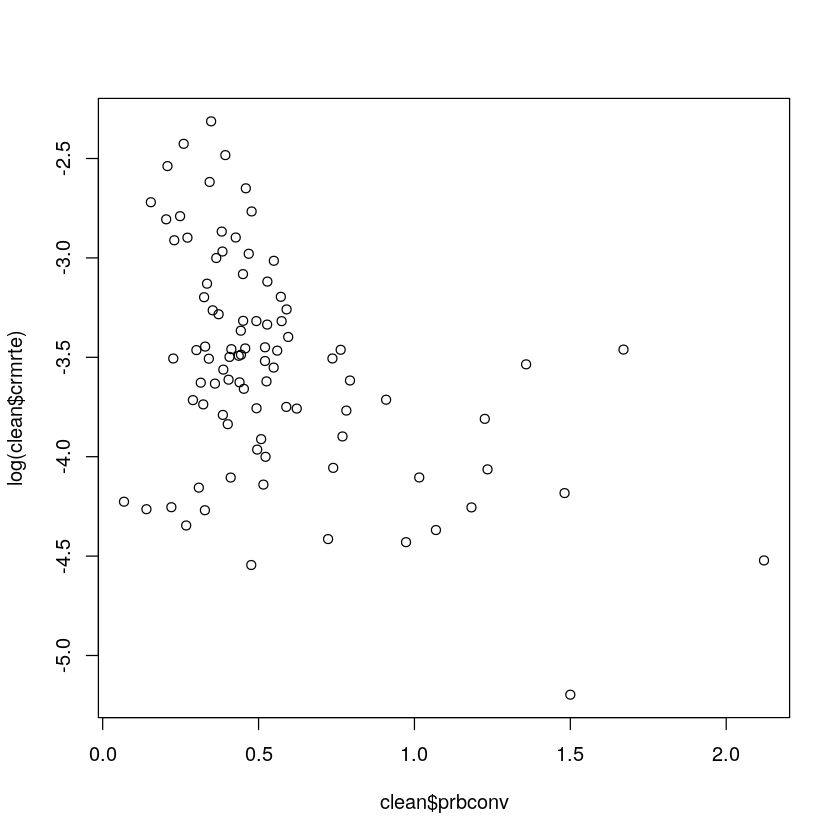

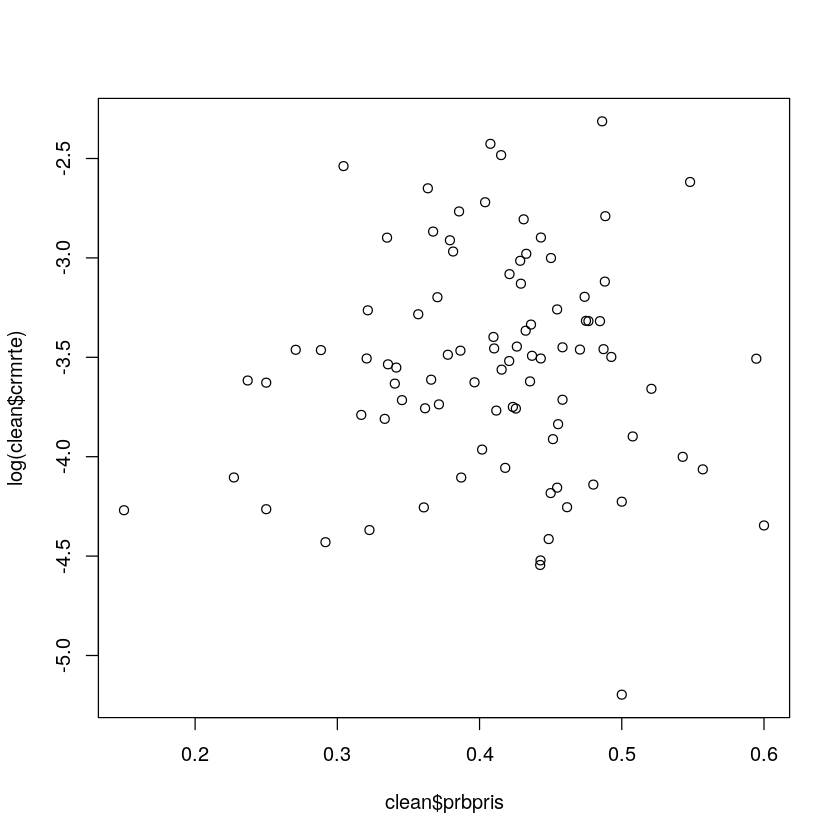

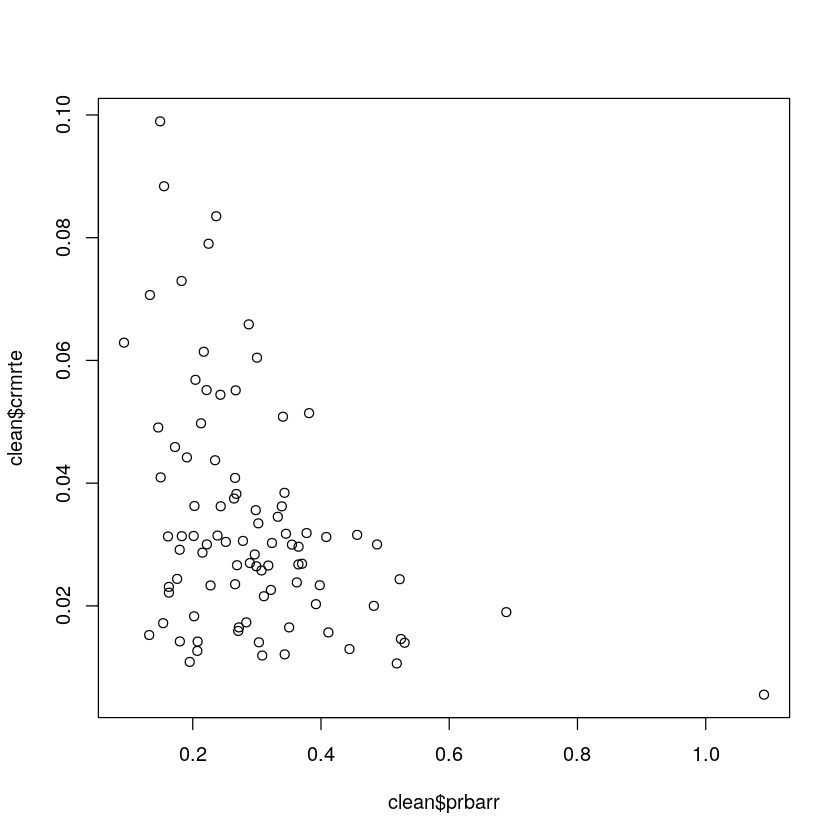

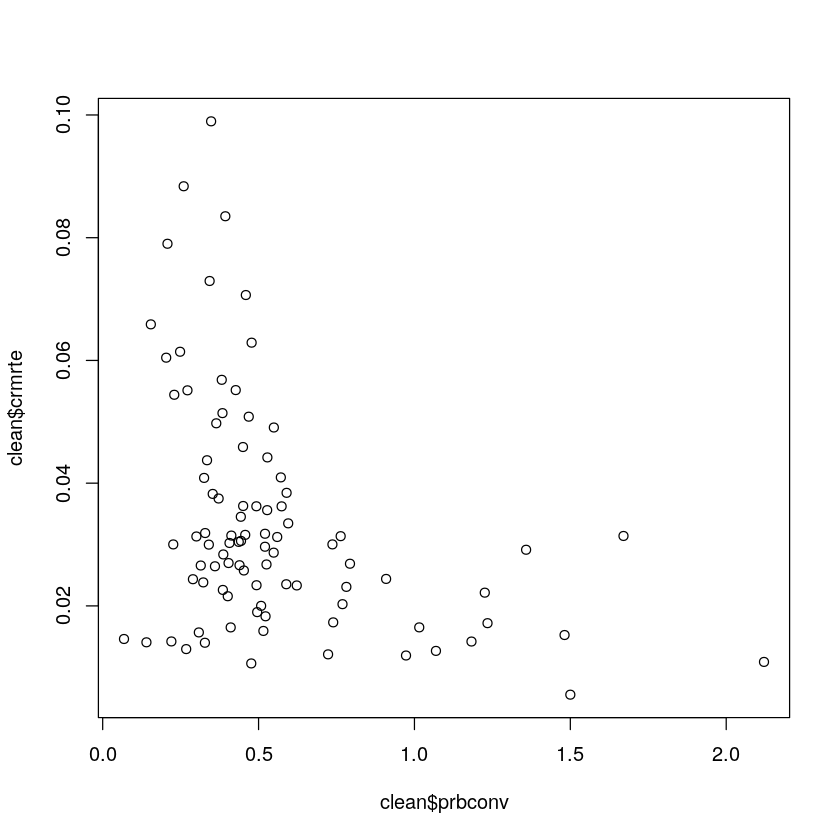

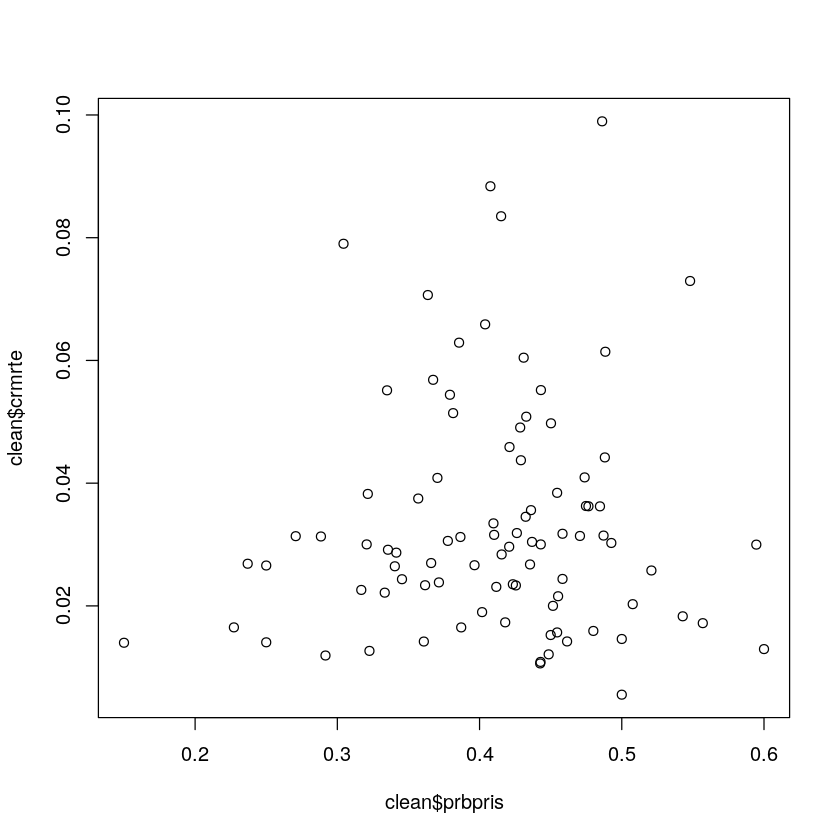

In [14]:
plot(clean$prbarr, log(clean$crmrte))
plot(clean$prbconv, log(clean$crmrte))
plot(clean$prbpris, log(clean$crmrte))

plot(clean$prbarr, clean$crmrte)
plot(clean$prbconv, clean$crmrte)
plot(clean$prbpris, clean$crmrte)

## Model 2: Density and Police per Capita

Having established our base model, we sought to introduce covariates that might (i) control for confounding effects and (ii) improve the model's fit to the underlying data without reducing its parsimony. 


Call:
lm(formula = log(crmrte) ~ density, data = clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4156 -0.2694 -0.0014  0.2470  1.2146 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.86949    0.06208 -62.334  < 2e-16 ***
density      0.22830    0.02976   7.671 2.17e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4272 on 88 degrees of freedom
Multiple R-squared:  0.4007,	Adjusted R-squared:  0.3939 
F-statistic: 58.84 on 1 and 88 DF,  p-value: 2.167e-11


[1] "Model: log(crmrte) ~ density"

[1] "Slope: 0.228298061464111"

[1] "Intercept: -3.86948808100506"

[1] "R-squared: 0.4"

[1] "Adjusted R-squared: 0.39"

[1] "Akaike Information Criterion: 106"

[1] "###############################"


Call:
lm(formula = log(crmrte) ~ polpc, data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69759 -0.33749  0.03606  0.32803  1.22573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.5516     0.1164 -30.513   <2e-16 ***
polpc         5.7624    59.0291   0.098    0.922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5518 on 88 degrees of freedom
Multiple R-squared:  0.0001083,	Adjusted R-squared:  -0.01125 
F-statistic: 0.00953 on 1 and 88 DF,  p-value: 0.9225


[1] "Model: log(crmrte) ~ polpc"

[1] "Slope: 5.76243862475338"

[1] "Intercept: -3.55156944182949"

[1] "R-squared: 0"

[1] "Adjusted R-squared: -0.01"

[1] "Akaike Information Criterion: 152"

[1] "###############################"

[1] "*******************************"

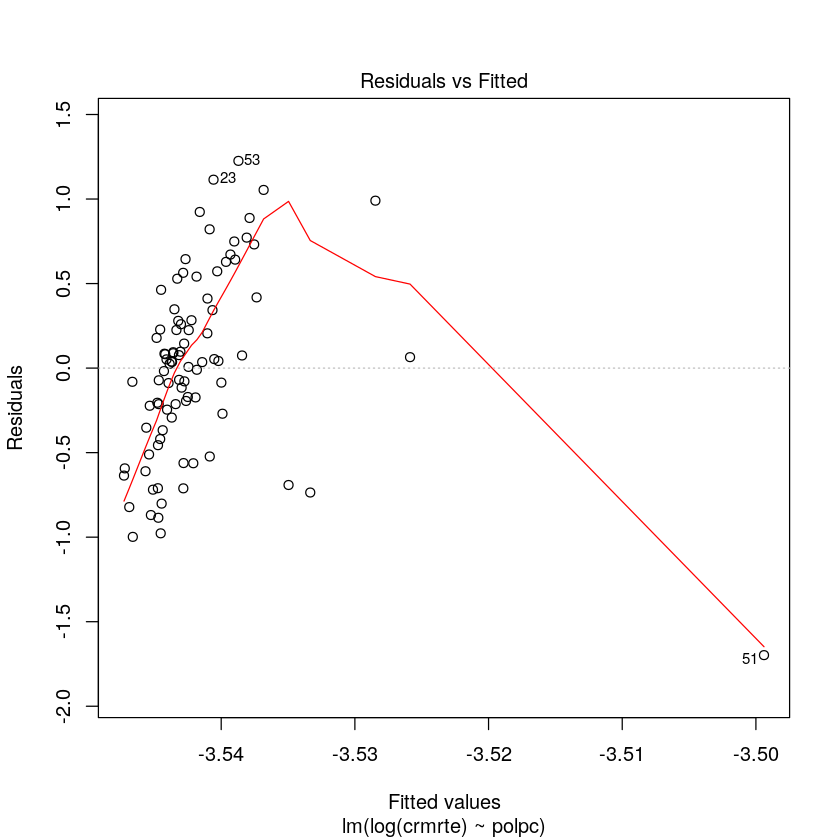

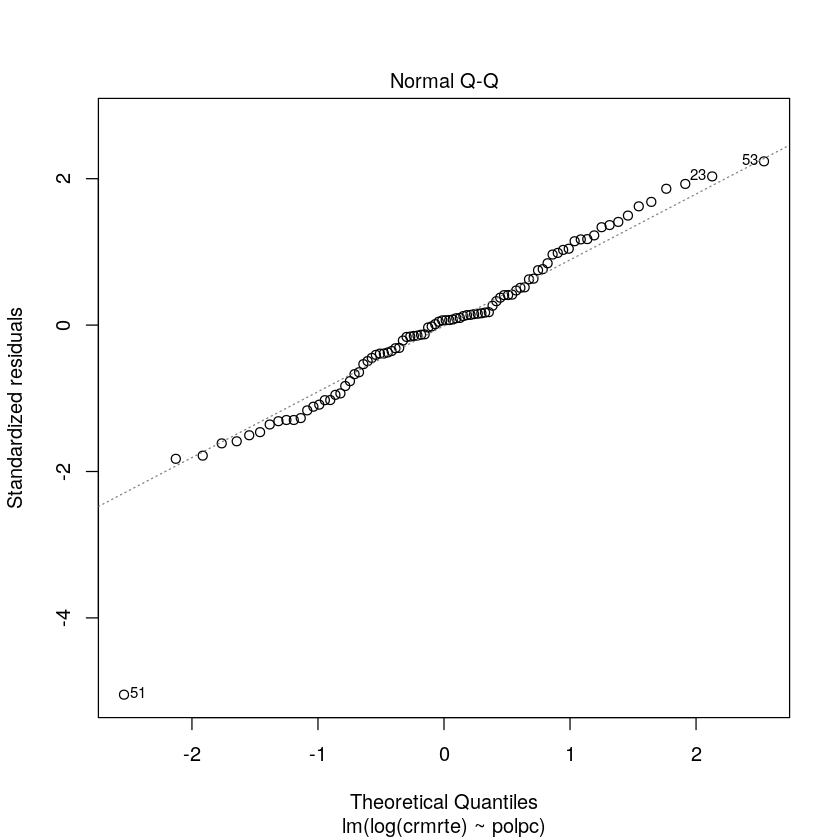

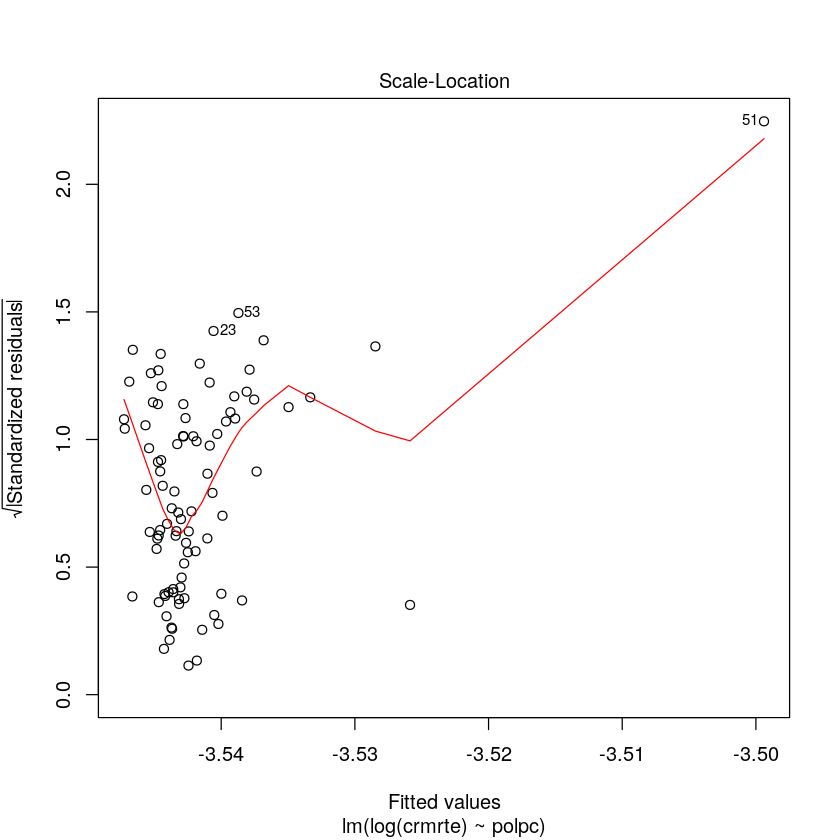


Call:
lm(formula = log(crmrte) ~ log(density), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48435 -0.25684  0.02248  0.31547  1.38622 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.52480    0.05069 -69.539  < 2e-16 ***
log(density)  0.19722    0.03704   5.325 7.66e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4799 on 88 degrees of freedom
Multiple R-squared:  0.2437,	Adjusted R-squared:  0.2351 
F-statistic: 28.35 on 1 and 88 DF,  p-value: 7.658e-07


[1] "Model: log(crmrte) ~ log(density)"

[1] "Slope: 0.197222782828707"

[1] "Intercept: -3.52480450822417"

[1] "R-squared: 0.24"

[1] "Adjusted R-squared: 0.24"

[1] "Akaike Information Criterion: 127"

[1] "###############################"


Call:
lm(formula = log(crmrte) ~ log(polpc), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38705 -0.28951  0.01975  0.30731  1.08133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.8472     0.9694  -0.874  0.38454   
log(polpc)    0.4172     0.1498   2.784  0.00657 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.529 on 88 degrees of freedom
Multiple R-squared:  0.08096,	Adjusted R-squared:  0.07052 
F-statistic: 7.752 on 1 and 88 DF,  p-value: 0.006566


[1] "Model: log(crmrte) ~ log(polpc)"

[1] "Slope: 0.417214374552627"

[1] "Intercept: -0.847152512192017"

[1] "R-squared: 0.08"

[1] "Adjusted R-squared: 0.07"

[1] "Akaike Information Criterion: 145"

[1] "###############################"

[1] "*******************************"

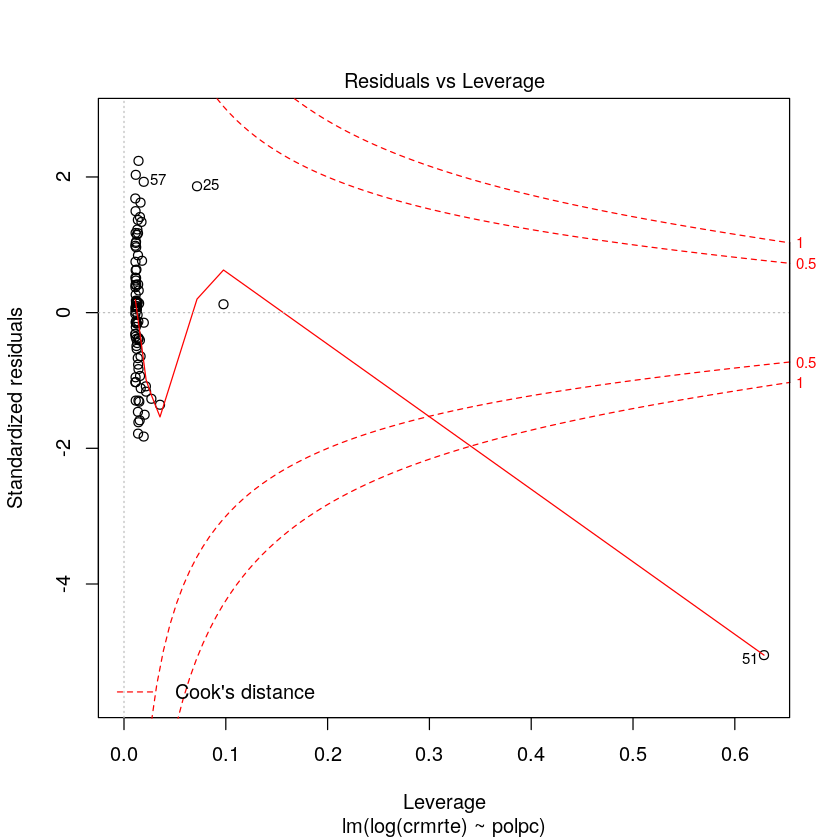

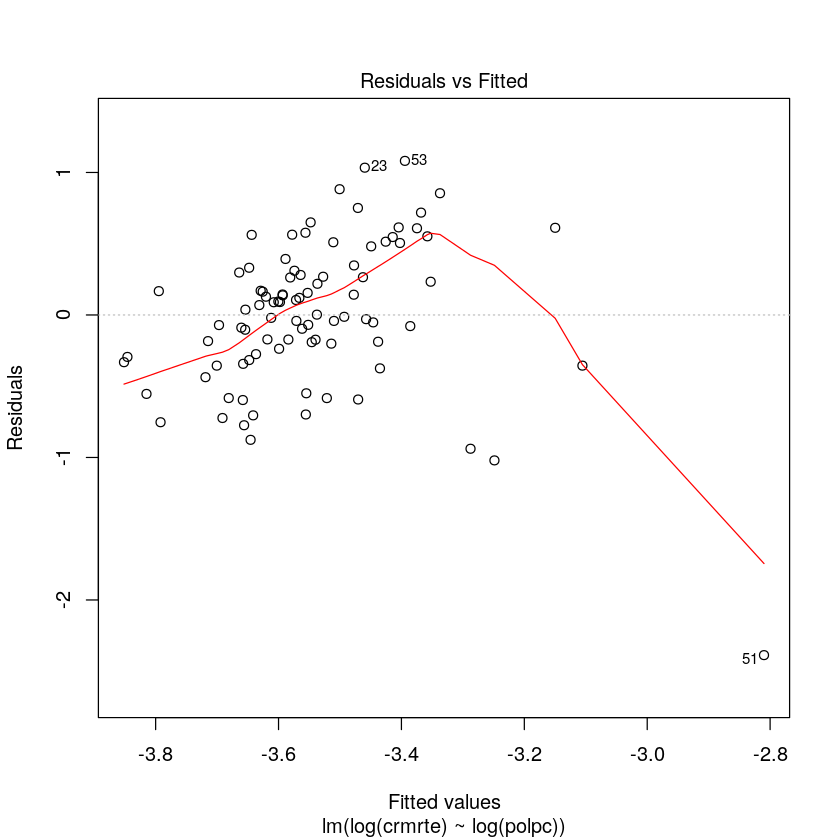

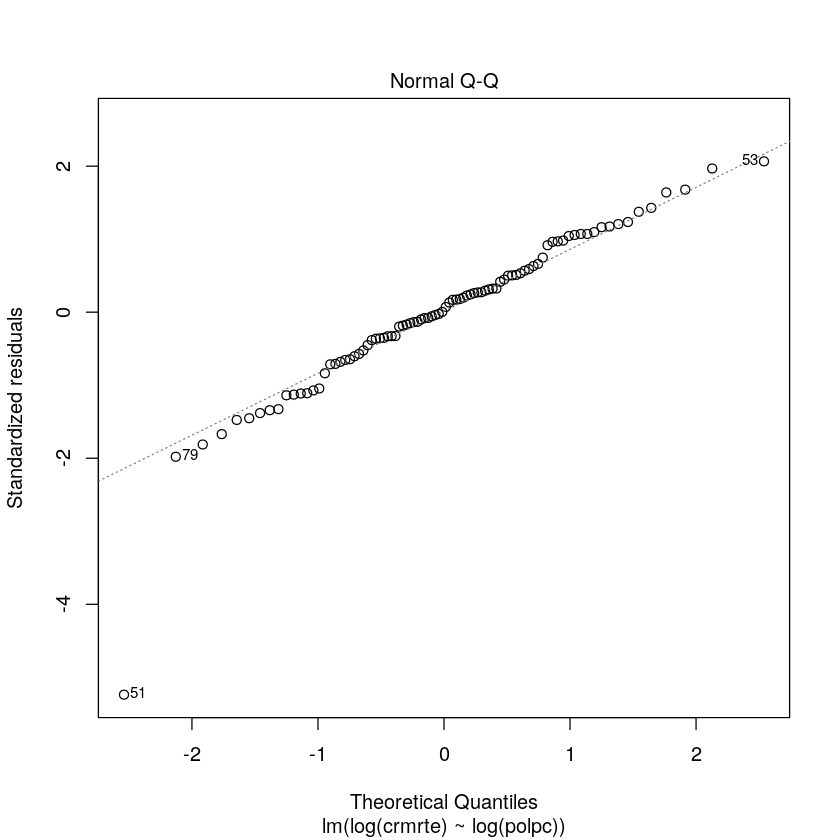

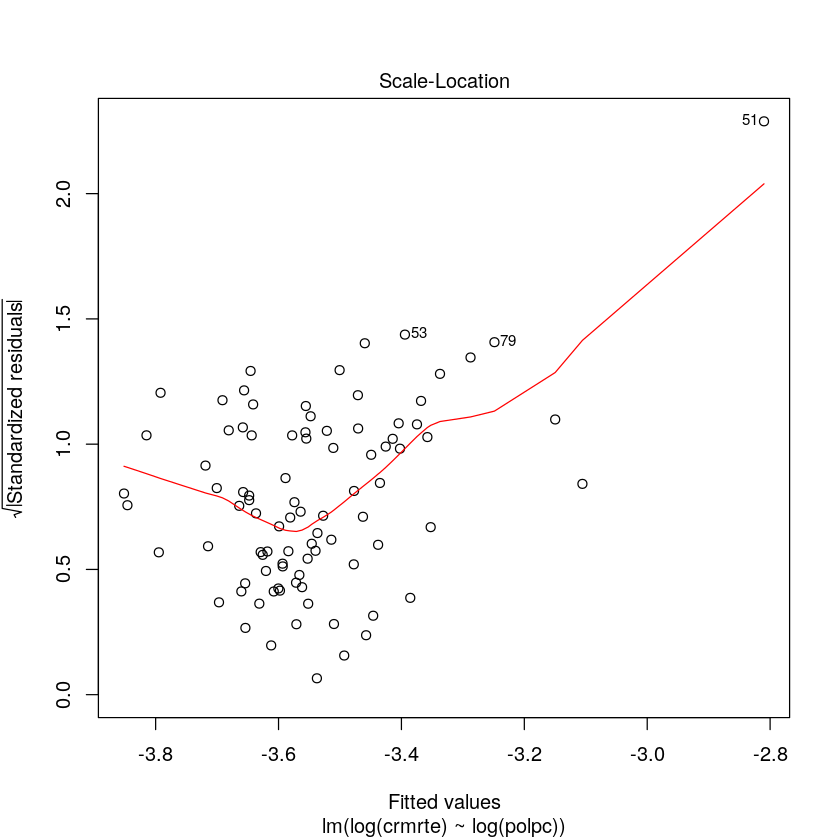


Call:
lm(formula = log(crmrte) ~ density + I(density^2), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31006 -0.29228 -0.02626  0.28185  1.29382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.06266    0.08845 -45.930  < 2e-16 ***
density       0.46900    0.08638   5.429 5.05e-07 ***
I(density^2) -0.03503    0.01187  -2.952  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4096 on 87 degrees of freedom
Multiple R-squared:  0.4553,	Adjusted R-squared:  0.4428 
F-statistic: 36.36 on 2 and 87 DF,  p-value: 3.336e-12


[1] "Model: log(crmrte) ~ density + I(density^2)"

[1] "Slope: 0.469003986894246"

[1] "Intercept: -4.06265700541314"

[1] "R-squared: 0.46"

[1] "Adjusted R-squared: 0.44"

[1] "Akaike Information Criterion: 100"

[1] "###############################"


Call:
lm(formula = log(crmrte) ~ taxpc, data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50578 -0.28741  0.06428  0.31539  1.15259 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.113998   0.167966  -24.49  < 2e-16 ***
taxpc        0.014996   0.004165    3.60 0.000525 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5152 on 88 degrees of freedom
Multiple R-squared:  0.1284,	Adjusted R-squared:  0.1185 
F-statistic: 12.96 on 1 and 88 DF,  p-value: 0.0005249


[1] "Model: log(crmrte) ~ taxpc"

[1] "Slope: 0.0149962108213407"

[1] "Intercept: -4.11399827550045"

[1] "R-squared: 0.13"

[1] "Adjusted R-squared: 0.12"

[1] "Akaike Information Criterion: 140"

[1] "###############################"


Call:
lm(formula = log(crmrte) ~ log(taxpc), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47056 -0.30166  0.06355  0.31479  1.13427 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.0761     0.7496  -8.105 2.82e-12 ***
log(taxpc)    0.7037     0.2076   3.390  0.00105 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.519 on 88 degrees of freedom
Multiple R-squared:  0.1155,	Adjusted R-squared:  0.1054 
F-statistic: 11.49 on 1 and 88 DF,  p-value: 0.001049


[1] "Model: log(crmrte) ~ log(taxpc)"

[1] "Slope: 0.703678483050045"

[1] "Intercept: -6.07606563292917"

[1] "R-squared: 0.12"

[1] "Adjusted R-squared: 0.11"

[1] "Akaike Information Criterion: 141"

[1] "###############################"

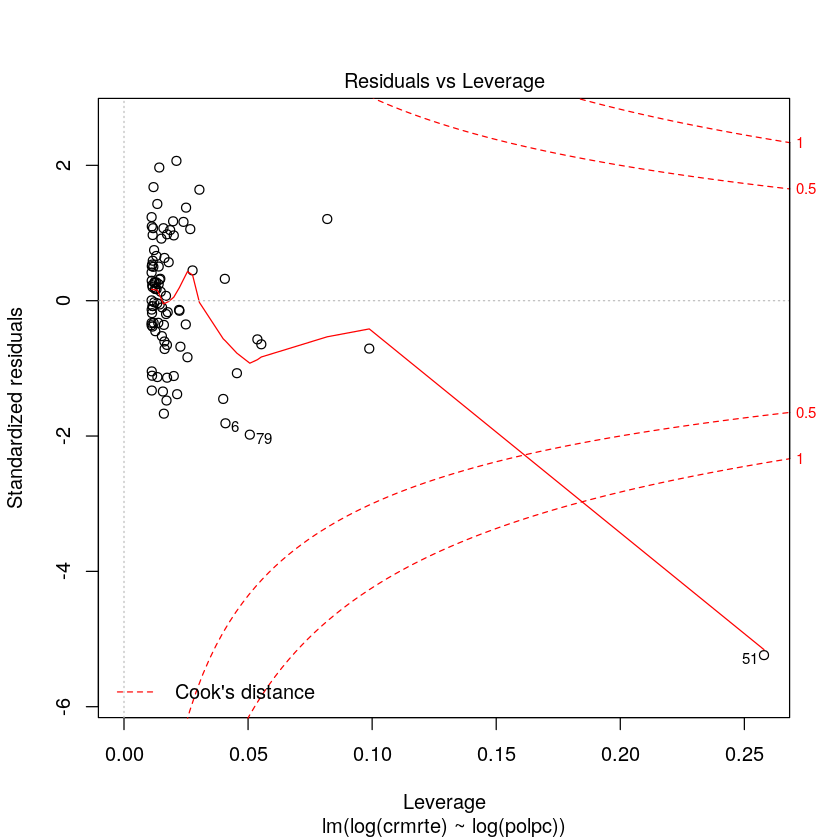

In [23]:
model2 <- lm(log(crmrte) ~ density, data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")

model2 <- lm(log(crmrte) ~ polpc, data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")
paste("*******************************")
plot(model2)

model2 <- lm(log(crmrte) ~ log(density), data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")

model2 <- lm(log(crmrte) ~ log(polpc), data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")
paste("*******************************")
plot(model2)

model2 <- lm(log(crmrte) ~ density + I(density^2), data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")


model2 <- lm(log(crmrte) ~ taxpc, data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")

model2 <- lm(log(crmrte) ~ log(taxpc), data=clean)
summary(model2)
paste("Model:", summary(model2)$call[2])
paste("Slope:", model2$coef[2])
paste("Intercept:", model2$coef[1])
paste("R-squared:", round(summary(model2)$r.squared, 2))
paste("Adjusted R-squared:", round(summary(model2)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model2), 0))
paste("###############################")

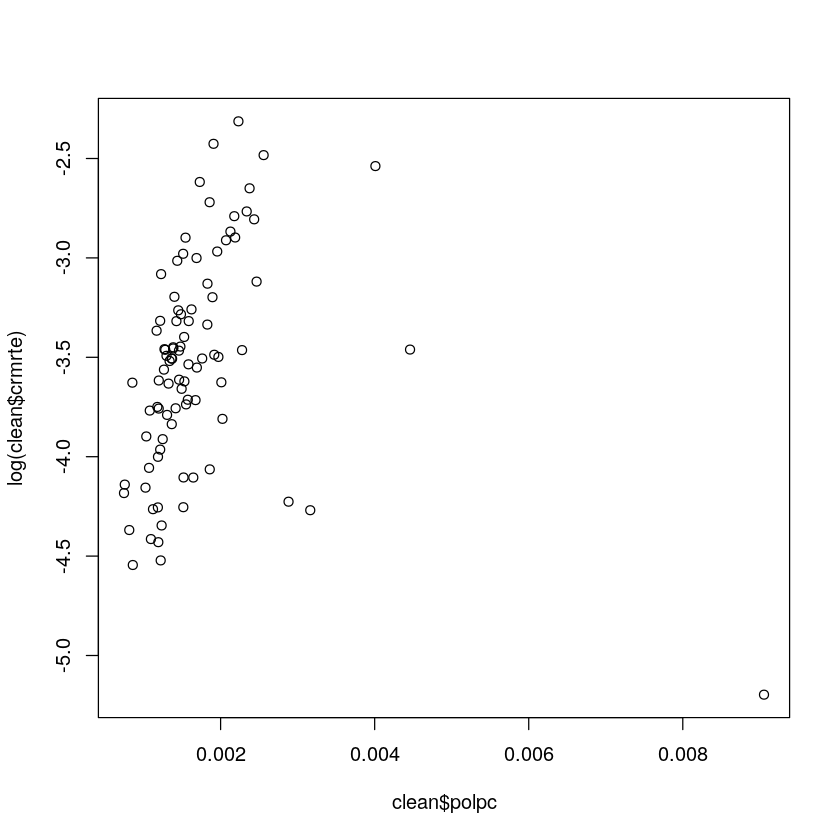

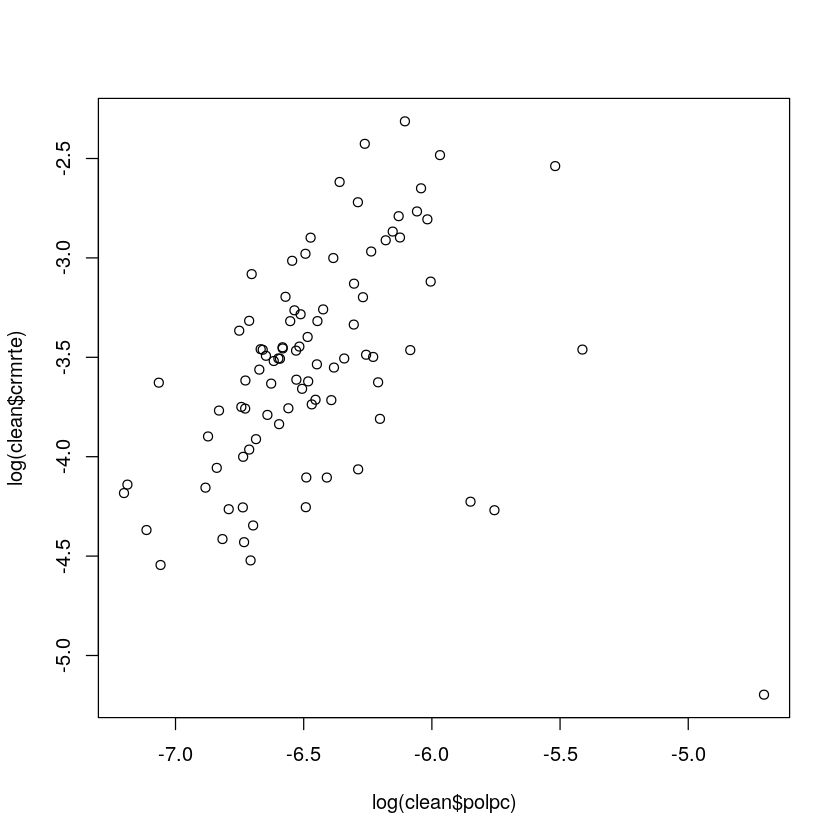

In [16]:
plot(clean$polpc, log(clean$crmrte))
plot(log(clean$polpc), log(clean$crmrte))


Call:
lm(formula = log(clean$crmrte) ~ first + second)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31006 -0.29228 -0.02626  0.28185  1.29382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.06266    0.08845 -45.930  < 2e-16 ***
first        0.46900    0.08638   5.429 5.05e-07 ***
second      -0.03503    0.01187  -2.952  0.00405 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4096 on 87 degrees of freedom
Multiple R-squared:  0.4553,	Adjusted R-squared:  0.4428 
F-statistic: 36.36 on 2 and 87 DF,  p-value: 3.336e-12


[1] "Akaike Information Criterion: 100"

[1] "Adjusted R-squared: 0.44"

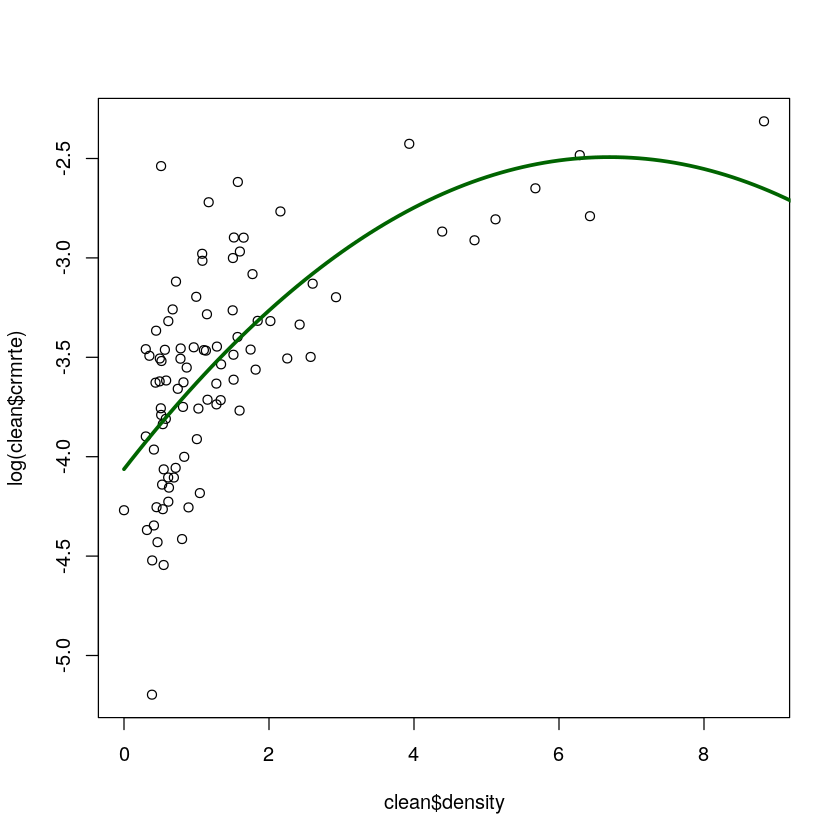

In [17]:
# plot(clean$density, clean$crmrte)
# plot(clean$density, log(clean$crmrte))
# plot(clean$density, log(clean$crmrte)+(log(clean$crmrte)^2))
# plot(log(clean$density), log(clean$crmrte))

first <- clean$density
second <- (clean$density)^2

# model <- lm(log(clean$crmrte) ~ log(clean$density))
# summary(model)
# plot(log(clean$density), log(clean$crmrte))
# abline(model)

# model <- lm(log(clean$crmrte) ~ clean$density)
# summary(model)
# plot(clean$density, log(clean$crmrte))
# abline(model)

# model <- lm(clean$crmrte ~ clean$density + (clean$density)^2)
# summary(model)
# plot(clean$density + (clean$density)^2, clean$crmrte)
# abline(model)



model <- lm(log(clean$crmrte) ~ first + second)
summary(model)
paste("Akaike Information Criterion:", round(AIC(model), 0))
paste("Adjusted R-squared:", round(summary(model)$adj.r.squared, 2))


densityvalues <- seq(0, 10, 0.1)
predictedvalues <- predict(model, list(first=densityvalues, second=densityvalues^2))
plot(clean$density, log(clean$crmrte))
lines(densityvalues, predictedvalues, col="darkgreen", lwd=3)

In [18]:
first <- clean$density
second <- (clean$density)^2

model1 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris), 
             data=clean)
summary(model1)
# paste("Model:", summary(model1)$call[2])
# paste("Slope (log(prbarr)):", model1$coef[2])
# paste("Slope (log(prbconv)):", model1$coef[3])
# paste("Slope (log(prbpris)):", model1$coef[4])
# paste("Intercept:", model1$coef[1])
# paste("R-squared:", round(summary(model1)$r.squared, 2))
# paste("Adjusted R-squared:", round(summary(model1)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model1), 0))
paste("###############################")

model21 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris)
             + log(density), data=clean)
summary(model21)
# paste("Model:", summary(model21)$call[2])
# paste("Slope (log(prbarr)):", model21$coef[2])
# paste("Slope (log(prbconv)):", model21$coef[3])
# paste("Slope (log(prbpris)):", model21$coef[4])
# paste("Intercept:", model21$coef[1])
# paste("R-squared:", round(summary(model21)$r.squared, 2))
# paste("Adjusted R-squared:", round(summary(model21)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model21), 0))
paste("###############################")

model22 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris)
             + density + I(density^2), data=clean)
summary(model22)
# paste("Model:", summary(model22$call[2])
# paste("Slope (log(prbarr)):", model22$coef[2])
# paste("Slope (log(prbconv)):", model22$coef[3])
# paste("Slope (log(prbpris)):", model22$coef[4])
# paste("Intercept:", model22$coef[1])
# paste("R-squared:", round(summary(model22)$r.squared, 2))
# paste("Adjusted R-squared:", round(summary(model22)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model22), 0))
paste("###############################")
model22$coef[1]
model22$coef[5]

model23 <- lm(log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris)
             + density + I(density^2) + log(polpc), data=clean)
summary(model23)
# paste("Model:", summary(model22$call[2])
# paste("Slope (log(prbarr)):", model22$coef[2])
# paste("Slope (log(prbconv)):", model22$coef[3])
# paste("Slope (log(prbpris)):", model22$coef[4])
# paste("Intercept:", model22$coef[1])
# paste("R-squared:", round(summary(model22)$r.squared, 2))
# paste("Adjusted R-squared:", round(summary(model22)$adj.r.squared, 2))
paste("Akaike Information Criterion:", round(AIC(model23), 0))
paste("###############################")


Call:
lm(formula = log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris), 
    data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.38771 -0.19140  0.07721  0.28329  0.87102 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.70768    0.26096 -18.040  < 2e-16 ***
log(prbarr)  -0.72380    0.11479  -6.305 1.19e-08 ***
log(prbconv) -0.47199    0.08272  -5.706 1.61e-07 ***
log(prbpris)  0.14773    0.20392   0.724    0.471    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4271 on 86 degrees of freedom
Multiple R-squared:  0.4147,	Adjusted R-squared:  0.3943 
F-statistic: 20.31 on 3 and 86 DF,  p-value: 4.84e-10


[1] "Akaike Information Criterion: 108"

[1] "###############################"


Call:
lm(formula = log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris) + 
    log(density), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19094 -0.22421  0.05617  0.25474  0.80643 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.74502    0.24223 -19.589  < 2e-16 ***
log(prbarr)  -0.54170    0.11641  -4.654 1.19e-05 ***
log(prbconv) -0.41846    0.07796  -5.368 6.81e-07 ***
log(prbpris) -0.21135    0.21068  -1.003 0.318619    
log(density)  0.14271    0.03688   3.869 0.000213 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3961 on 85 degrees of freedom
Multiple R-squared:  0.5024,	Adjusted R-squared:  0.479 
F-statistic: 21.45 on 4 and 85 DF,  p-value: 2.933e-12


[1] "Akaike Information Criterion: 96"

[1] "###############################"


Call:
lm(formula = log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris) + 
    density + I(density^2), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91580 -0.20483 -0.01127  0.24672  0.87197 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.70403    0.22542 -20.868  < 2e-16 ***
log(prbarr)  -0.44202    0.10894  -4.058 0.000111 ***
log(prbconv) -0.32055    0.07507  -4.270 5.12e-05 ***
log(prbpris)  0.02835    0.17497   0.162 0.871664    
density       0.33352    0.08163   4.086 1.00e-04 ***
I(density^2) -0.02515    0.01074  -2.341 0.021622 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3638 on 84 degrees of freedom
Multiple R-squared:  0.5851,	Adjusted R-squared:  0.5604 
F-statistic: 23.69 on 5 and 84 DF,  p-value: 8.828e-15


[1] "Akaike Information Criterion: 81"

[1] "###############################"

(Intercept) 
  -4.704033

density 
0.3335154


Call:
lm(formula = log(crmrte) ~ log(prbarr) + log(prbconv) + log(prbpris) + 
    density + I(density^2) + log(polpc), data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94783 -0.24367 -0.00679  0.25451  0.70666 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.56272    0.75063  -4.746 8.54e-06 ***
log(prbarr)  -0.47510    0.10994  -4.322 4.27e-05 ***
log(prbconv) -0.32054    0.07440  -4.308 4.49e-05 ***
log(prbpris)  0.04345    0.17366   0.250 0.803048    
density       0.30523    0.08282   3.685 0.000406 ***
I(density^2) -0.02355    0.01069  -2.202 0.030442 *  
log(polpc)    0.17605    0.11054   1.593 0.115043    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3605 on 83 degrees of freedom
Multiple R-squared:  0.5974,	Adjusted R-squared:  0.5683 
F-statistic: 20.53 on 6 and 83 DF,  p-value: 1.363e-14


[1] "Akaike Information Criterion: 80"

[1] "###############################"